# Part 1

In [34]:
import pandas as pd
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [35]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [36]:
y.shape

(70000,)

In [37]:
X.head(2)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
y[0]

'5'

In [39]:
X = X.to_numpy()

In [40]:
import numpy as np
y = y.astype(np.uint8)
y[0]

5

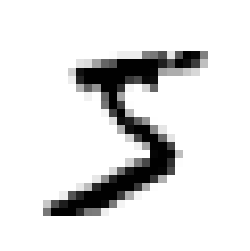

In [41]:
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.figure(figsize=(3,3))
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [42]:
X_train_RAW, X_test_RAW, y_train_RAW, y_test_RAW = X[:60000], X[60000:], y[:60000], y[60000:]

Get a DataFrame column that contain only the 5s and 3s for training and testing

In [43]:
# Train data
y_train_p1 = y_train_RAW[(y_train_RAW == 3) | (y_train_RAW == 5)]

y_train_p1_3 = y_train_p1 == 3

X_train_p1 = X_train_RAW[(y_train_RAW == 3) | (y_train_RAW == 5)]

# Test data
y_test_p1 = y_test_RAW[(y_test_RAW == 3) | (y_test_RAW == 5)]

y_test_p1_3 = y_test_p1 == 3

X_test_p1 = X_test_RAW[(y_test_RAW == 3) | (y_test_RAW == 5)] 


In [44]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_p1, y_train_p1_3)

SGDClassifier(random_state=42)

In [45]:
sgd_clf.predict([some_digit])

array([False])

A) Use cross_val_score() to show the accuracy of prediction under cross validation. 

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train_p1, y_train_p1_3, cv = 3 , scoring = "accuracy")

array([0.92962867, 0.95299922, 0.94701299])

B) Use cross_val_predict() to generate predictions on the training data.

In [47]:
from sklearn.model_selection import cross_val_predict
y_p1_pred = cross_val_predict(sgd_clf, X_train_p1, y_train_p1_3, cv =3)
y_p1_pred

array([False,  True,  True, ..., False,  True, False])

Confusion Matrix

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_p1_3, y_p1_pred)

array([[4994,  427],
       [ 229, 5902]], dtype=int64)

Precision Score

In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_p1_3, y_p1_pred)


0.9325327855901406

Recall Score

In [50]:
recall_score(y_train_p1_3, y_p1_pred)

0.9626488337954656

F1 Score

In [51]:
f1_score(y_train_p1_3, y_p1_pred)

0.9473515248796147

C) Use cross_val_predict() to generate the prediction scores on the training set. Then, plot the 
precision and recall curves as functions of the threshold value. 

In [52]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train_p1, y_train_p1_3, cv = 3, method = "decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_p1_3, y_scores)

In [53]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    plt.legend(loc = "best")
    plt.grid()
    plt.xlabel('Threshold')

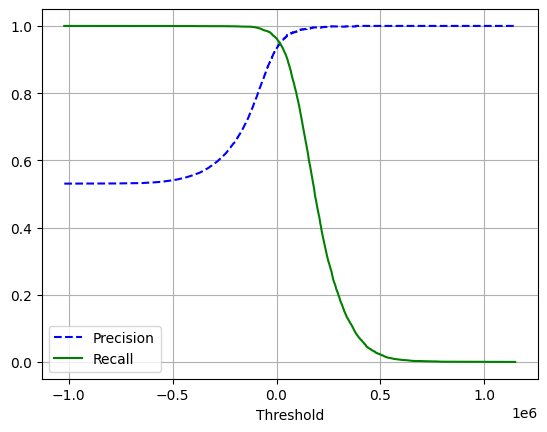

In [54]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

D)  Based on the curves, what will be a sensible threshold value to choose? Generate predictions under the chosen threshold value. Evaluate the precision and recall scores using the predictions.

Because these curves intersect around roughly 0, I will use this as the threshold value to maximize both precision and recall.

In [55]:
threshold_00 = thresholds[np.argmax(precisions >= 0)]
y_p1_pred_00 = (y_scores >= threshold_00)

precision_score(y_train_p1_3, y_p1_pred_00)

0.5307306094182825

In [56]:
recall_score(y_train_p1_3, y_p1_pred_00)

1.0

E) Plot the ROC curve and evaluate the ROC AUC score. 

In [57]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_p1_3, y_scores)

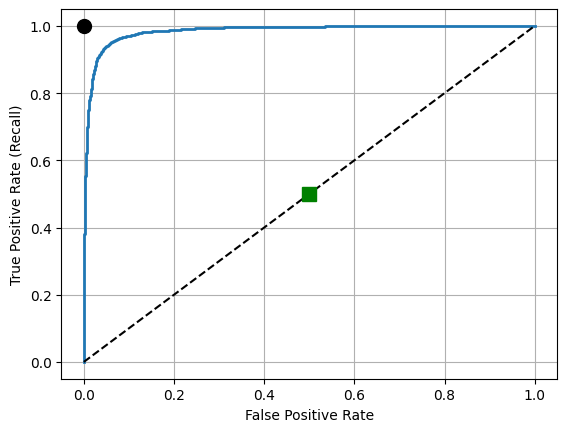

In [58]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.plot(0, 1, marker='o', markersize=10, markeredgecolor="black", markerfacecolor="black")
    plt.plot(0.5, 0.5, marker="s", markersize=10, markeredgecolor="green", markerfacecolor="green")


plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()


ROC AUC Score

In [59]:
roc_auc_score(y_train_p1_3, y_scores)

0.9851212013087797

F) RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest= cross_val_predict(forest_clf, X_train_p1, y_train_p1_3, cv = 3, method = "predict_proba")

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_p1_3, y_scores_forest)

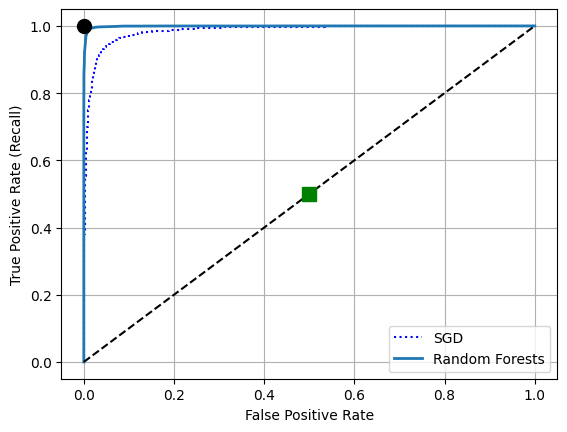

In [61]:
plt.plot(false_positive_rate, true_positive_rate, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forests")
plt.legend(loc = "lower right")
plt.show()

In [62]:
roc_auc_score(y_train_p1_3, y_scores_forest)

0.9992079106873717

G) Standard Scaler on X (features) data before training the model

In [63]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_p1 = scaler.fit_transform(X_train_p1)


In [64]:
forest_clf = RandomForestClassifier(random_state=42)


y_probas_forest= cross_val_predict(forest_clf, X_train_p1, y_train_p1_3, cv = 3, method = "predict_proba")

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_p1_3, y_scores_forest)

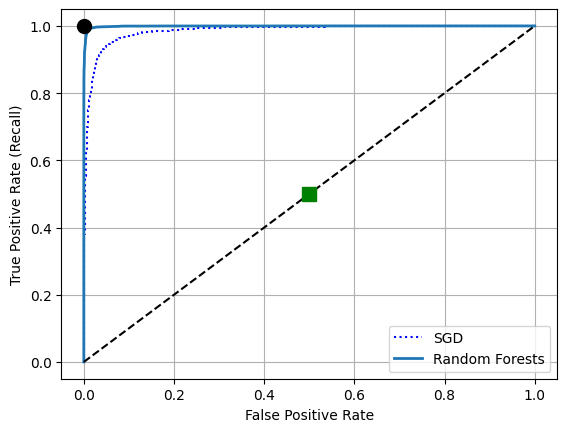

In [65]:
plt.plot(false_positive_rate, true_positive_rate, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forests")
plt.legend(loc = "lower right")
plt.show()

In [66]:
roc_auc_score(y_train_p1_3, y_scores_forest)

0.9992048718276675